In [9]:


import tensorflow as tf
from keras import Sequential,Model
from keras.layers import LSTM, Dense, Input
import numpy as np

from keras.utils import plot_model

# import wandb
# from wandb.keras import WandbMetricsLogger
#
# wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\hurui/.netrc


True

In [10]:
X = np.array([1,4,7,10,14,18,21,26,29,32,36,40, 45,50,55])
Y = np.array([[2,3],[5,6],[8,9],[11,12],[15,16],[19,20],[22,23],[24,25],[30,31],[33,34],[37,38],[41,42],[46,47],[51,52],[56,57]])

X = np.array(X).reshape(15, 1, 1)
Y = np.array(Y)

print(f"Shape of X: {X.shape} and shape of Y: {Y.shape}")


Shape of X: (15, 1, 1) and shape of Y: (15, 2)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 1)]            0         
                                                                 
 lstm (LSTM)                 (None, 5)                 140       
                                                                 
 dense (Dense)               (None, 2)                 12        
                                                                 
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________


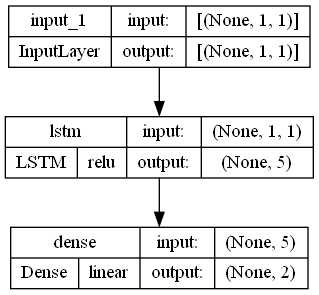

In [11]:

tf.keras.backend.clear_session()

inputs = Input(shape=(1,1))
lstm = LSTM(5, activation="relu",unroll=False)(inputs)
outputs = Dense(2)(lstm)
model = Model(inputs, outputs)

model.compile(optimizer='adam', loss='mse')

model.summary()
plot_model (model, to_file = "One2Many.png", show_shapes = True, show_layer_names = True,show_layer_activations=True,expand_nested=True)

In [12]:
# run = wandb.init(project="lstm-keras_Hu")
#
# _ = model.fit(X, Y, epochs=1000, validation_split=0.2, batch_size=3, callbacks=[WandbMetricsLogger(log_freq=2)])
#
# run.finish()

wandb: Currently logged in as: hrflove99 (huruifeng). Use `wandb login --relogin` to force relogin


Epoch 1/1000
4/4 [==============================] - 2s 76ms/step - loss: 595.4593 - val_loss: 2668.7666
Epoch 2/1000
4/4 [==============================] - 0s 9ms/step - loss: 595.2564 - val_loss: 2668.3811
Epoch 3/1000
4/4 [==============================] - 0s 9ms/step - loss: 595.0637 - val_loss: 2667.9978
Epoch 4/1000
4/4 [==============================] - 0s 9ms/step - loss: 594.8532 - val_loss: 2667.6145
Epoch 5/1000
4/4 [==============================] - 0s 9ms/step - loss: 594.6435 - val_loss: 2667.2258
Epoch 6/1000
4/4 [==============================] - 0s 9ms/step - loss: 594.4268 - val_loss: 2666.8352
Epoch 7/1000
4/4 [==============================] - 0s 8ms/step - loss: 594.1940 - val_loss: 2666.4485
Epoch 8/1000
4/4 [==============================] - 0s 9ms/step - loss: 593.9504 - val_loss: 2666.0598
Epoch 9/1000
4/4 [==============================] - 0s 9ms/step - loss: 593.6808 - val_loss: 2665.6719
Epoch 10/1000
4/4 [==============================] - 0s 9ms/step - loss:

batch/batch_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
batch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/loss,▇█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/loss,█▇▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch/val_loss,█▆▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/batch_step,3998
batch/learning_rate,0.001
batch/loss,0.71264
epoch/epoch,999


In [25]:
model.compile(optimizer='adam', loss='mse')
model.fit(X, Y, epochs=1000, validation_split=0.2)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 607.2104 - val_loss: 2697.7661
Epoch 2/1000
1/1 [==============================] - 0s 31ms/step - loss: 605.4628 - val_loss: 2690.0957
Epoch 3/1000
1/1 [==============================] - 0s 31ms/step - loss: 603.7359 - val_loss: 2682.5667
Epoch 4/1000
1/1 [==============================] - 0s 31ms/step - loss: 602.0293 - val_loss: 2675.1755
Epoch 5/1000
1/1 [==============================] - 0s 26ms/step - loss: 600.3424 - val_loss: 2667.9175
Epoch 6/1000
1/1 [==============================] - 0s 21ms/step - loss: 598.6744 - val_loss: 2660.7874
Epoch 7/1000
1/1 [==============================] - 0s 31ms/step - loss: 597.0246 - val_loss: 2653.7803
Epoch 8/1000
1/1 [==============================] - 0s 31ms/step - loss: 595.3917 - val_loss: 2646.8889
Epoch 9/1000
1/1 [==============================] - 0s 32ms/step - loss: 593.7747 - val_loss: 2640.1067
Epoch 10/1000
1/1 [==============================] - 0s 29ms/step 

In [26]:
test_input = np.array([10])
test_input = test_input.reshape((1, 1, 1))
test_output = model.predict(test_input)
print(test_output)

1/1 [==============================] - 0s 131ms/step
[[11.126605 12.155481]]
